In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Import Training data
Evals = {}

Names = ['EvalLSTURIni', 'EvaluationTranformerIniNone', 'EvaluationTranformerOwnIniNone']
Keys = ['LSTUR', 'TransformerIni', 'TransformerIniOwn']
for name,key in zip(Names,Keys):
    filestr = f'TestSmall/{name}.pkl'
    with open(filestr, 'rb') as f:
        file = pickle.load(f)
        Evals[key] = file if type(file) == dict else file[0]





In [2]:
Evals['LSTUR'].keys()

dict_keys(['AUC', 'MRR', 'NDCG5', 'NDCG10', 'loss_vali', 'Loss_training'])

In [3]:
# Get End Scores for each model
EndScores = {'AUC':{}, 'MRR':{}, 'NDCG5':{}, 'NDCG10':{} }#, 'loss_vali':{}}

# Get AUC, MRR, NDCG5, NDCG10, loss_vali
for name in Keys:
    print(name)
    # Get last value of each metric
    EndScores['AUC'][name] = Evals[name]['AUC'][-1]
    EndScores['MRR'][name] = Evals[name]['MRR'][-1]
    EndScores['NDCG5'][name] = Evals[name]['NDCG5'][-1]
    EndScores['NDCG10'][name] = Evals[name]['NDCG10'][-1]
    #EndScores['loss_vali'][name] = Evals[name]['loss_vali'][-1]


LSTUR
TransformerIni
TransformerIniOwn


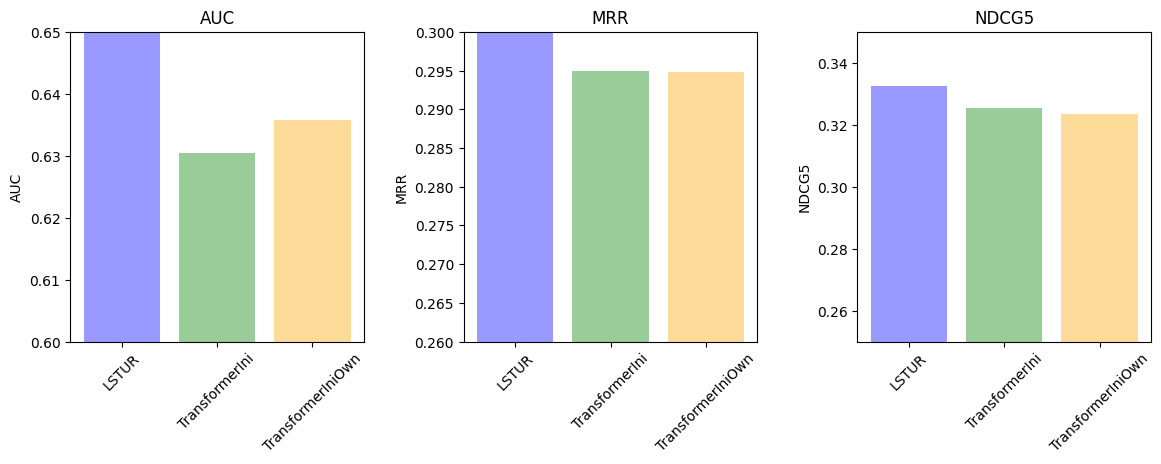

In [4]:
# Make a Bar plot of the scores

# Make a dataframe
df = pd.DataFrame(EndScores)

# Make a bar plot
fig, ax  = plt.subplots(1,3,figsize=(12,5))

Metrics = ['AUC', 'MRR', 'NDCG5'] #, 'NDCG10']
Intervals = [[0.6,0.65],[0.26,0.30],[0.25,0.35]] #,[0.20,0.40]]

for idx,(metric,interval) in enumerate(zip(Metrics,Intervals)):

    # Plot AUC
    ax[idx].bar(df.index, df[metric], label=metric, color= ['blue','green', 'orange'])

    # set alpha value to 0.5 for all bars
    for i in range(len(df)):
        ax[idx].get_children()[i].set_alpha(0.4)

    # Angle the x-ticks
    ax[idx].tick_params(axis='x', rotation=45)

    # Set the y-axis limits
    ax[idx].set_ylim(interval)

    # Set the subtitle
    ax[idx].set_title(metric)

    # Set the y-axis label
    ax[idx].set_ylabel(metric)

fig.tight_layout(pad=2.0)




In [5]:
df

,AUC,MRR,NDCG5,NDCG10
LSTUR,0.6562,0.3041,0.3324,0.3987
TransformerIni,0.6305,0.2950,0.3255,0.3868
TransformerIniOwn,0.6358,0.2948,0.3235,0.3866


In [41]:
# Load Final Predictions
from TestData.MindDependencies.Metrics import cal_metric

with open('TestSmall/LSTURinismallPredictions.pkl', 'rb') as f:
    LSTUR_predictions = pickle.load(f)

# get the labels and predictions for known and unknown users

LSTUR_known_labels = []
LSTUR_known_preds = []

LSTUR_unknown_labels = []
LSTUR_unknown_preds = []

for idx in range(len(LSTUR_predictions['labels'])):
    pred = LSTUR_predictions['preds'][idx]
    label = LSTUR_predictions['labels'][idx]
    user_id = LSTUR_predictions['user ids'][idx]

    if user_id == 0:
        LSTUR_unknown_labels.append(label)
        LSTUR_unknown_preds.append(pred)
    else:
        LSTUR_known_labels.append(label)
        LSTUR_known_preds.append(pred)

# Get the metrics for known and unknown users

LSTUR_mectrics = cal_metric(LSTUR_predictions['labels'], LSTUR_predictions['preds'],metrics=['group_auc', 'mean_mrr', 'ndcg@5;10'])

LSTUR_known_metrics = cal_metric(LSTUR_known_labels, LSTUR_known_preds,metrics=['group_auc', 'mean_mrr', 'ndcg@5;10'])

LSTUR_unknown_metrics = cal_metric(LSTUR_unknown_labels, LSTUR_unknown_preds,metrics=['group_auc', 'mean_mrr', 'ndcg@5;10'])

# print the metrics

print('LSTUR metrics: ', LSTUR_mectrics)

print('LSTUR known users metrics: ', LSTUR_known_metrics)

print('LSTUR unknown users metrics: ', LSTUR_unknown_metrics)


LSTUR metrics:  {'group_auc': 0.6562, 'mean_mrr': 0.3041, 'ndcg@5': 0.3324, 'ndcg@10': 0.3987}
LSTUR known users metrics:  {'group_auc': 0.643, 'mean_mrr': 0.2967, 'ndcg@5': 0.323, 'ndcg@10': 0.3889}
LSTUR unknown users metrics:  {'group_auc': 0.6581, 'mean_mrr': 0.3051, 'ndcg@5': 0.3337, 'ndcg@10': 0.4001}


In [40]:
# Get the predictions for the other models

with open('TestSmall/TransformerinismallPredictions.pkl', 'rb') as f:
    Transformer_predictions = pickle.load(f)

with open('TestSmall/TransformerOwninismallPredictions.pkl', 'rb') as f:
    TransformerOwn_predictions = pickle.load(f)

# get the labels and predictions for known and unknown users

Transformer_known_labels = []
Transformer_known_preds = []

Transformer_unknown_labels = []
Transformer_unknown_preds = []

for idx in range(len(Transformer_predictions['labels'])):
    pred = Transformer_predictions['preds'][idx]
    label = Transformer_predictions['labels'][idx]
    user_id = Transformer_predictions['user ids'][idx]

    if user_id == 0:
        Transformer_unknown_labels.append(label)
        Transformer_unknown_preds.append(pred)
    else:
        Transformer_known_labels.append(label)
        Transformer_known_preds.append(pred)

# Get the metrics for known and unknown users

Transformer_mectrics = cal_metric(Transformer_predictions['labels'], Transformer_predictions['preds'],metrics=['group_auc', 'mean_mrr', 'ndcg@5;10'])

Transformer_known_metrics = cal_metric(Transformer_known_labels, Transformer_known_preds,metrics=['group_auc', 'mean_mrr', 'ndcg@5;10'])

Transformer_unknown_metrics = cal_metric(Transformer_unknown_labels, Transformer_unknown_preds,metrics=['group_auc', 'mean_mrr', 'ndcg@5;10'])

# print the metrics

print('Transformer metrics: ', Transformer_mectrics)

print('Transformer known users metrics: ', Transformer_known_metrics)

print('Transformer unknown users metrics: ', Transformer_unknown_metrics)


# get the labels and predictions for known and unknown users

TransformerOwn_known_labels = []
TransformerOwn_known_preds = []

TransformerOwn_unknown_labels = []
TransformerOwn_unknown_preds = []

for idx in range(len(TransformerOwn_predictions['labels'])):
    pred = TransformerOwn_predictions['preds'][idx]
    label = TransformerOwn_predictions['labels'][idx]
    user_id = TransformerOwn_predictions['user ids'][idx]

    if user_id == 0:
        TransformerOwn_unknown_labels.append(label)
        TransformerOwn_unknown_preds.append(pred)
    else:
        TransformerOwn_known_labels.append(label)
        TransformerOwn_known_preds.append(pred)

# Get the metrics for known and unknown users

TransformerOwn_mectrics = cal_metric(TransformerOwn_predictions['labels'], TransformerOwn_predictions['preds'],metrics=['group_auc', 'mean_mrr', 'ndcg@5;10'])

TransformerOwn_known_metrics = cal_metric(TransformerOwn_known_labels, TransformerOwn_known_preds,metrics=['group_auc', 'mean_mrr', 'ndcg@5;10'])

TransformerOwn_unknown_metrics = cal_metric(TransformerOwn_unknown_labels, TransformerOwn_unknown_preds,metrics=['group_auc', 'mean_mrr', 'ndcg@5;10'])

# print the metrics

print('TransformerOwn metrics: ', TransformerOwn_mectrics)

print('TransformerOwn known users metrics: ', TransformerOwn_known_metrics)

print('TransformerOwn unknown users metrics: ', TransformerOwn_unknown_metrics)



Transformer metrics:  {'group_auc': 0.6305, 'mean_mrr': 0.295, 'ndcg@5': 0.3255, 'ndcg@10': 0.3868}
Transformer known users metrics:  {'group_auc': 0.629, 'mean_mrr': 0.2929, 'ndcg@5': 0.3225, 'ndcg@10': 0.3851}
Transformer unknown users metrics:  {'group_auc': 0.6307, 'mean_mrr': 0.2953, 'ndcg@5': 0.326, 'ndcg@10': 0.3871}
TransformerOwn metrics:  {'group_auc': 0.6358, 'mean_mrr': 0.2948, 'ndcg@5': 0.3235, 'ndcg@10': 0.3866}
TransformerOwn known users metrics:  {'group_auc': 0.6341, 'mean_mrr': 0.2914, 'ndcg@5': 0.3195, 'ndcg@10': 0.3828}
TransformerOwn unknown users metrics:  {'group_auc': 0.6361, 'mean_mrr': 0.2953, 'ndcg@5': 0.324, 'ndcg@10': 0.3871}
